# Data Cleaning

# 0.0 Introduction

In this notebook I inspect the data to make sure it is clean. I may apply basic transformations to make visualization and modeling easier. At the end I split the data and save it to new files.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

np.random.seed(42)

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503




# 1.0 Cleaning

First I will make sure the data is clean by checking that all of the data types are appopriate, That there aren't any unecessary columns, There are no null values, and that all the values make sense.

## 1.1 Checking Data Types

In [3]:
# print out all of the column names with there data type
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

Zipcode is currently a numerical data type. This doesn't make since because there is no way to gain insight out of the zipcode's value with arithmatic. So I will change the zipcode column to the string data type to better represent that its a categorical value.

In [4]:
# change zipcode's data type to string
df["zipcode"] = df["zipcode"].astype(str)

## 1.2 Remove Unecessary values

By looking at the data I can see that the "id" and "date" columns are irrelevant to the problem so I will drop them.

In [5]:
# drop id and date from the data
df.drop(["id", "date"], axis=1, inplace=True)

## 1.3 Check For Nulls and Duplicates

In [6]:
# check for null values
df.isna().sum().sum()

0

In [7]:
# check for duplicate values
df.duplicated().sum()

5

In [8]:
# remove duplicate values
df = df.drop_duplicates()

## 1.4 Make Sure All Values Make Sense

I will quickly check that the values make sense by checking there minimum and maximum values.

In [9]:
# check minimum and maximum values
pd.concat([df.min(), df.max()], axis=1)

,0,1
price,75000.0000,7.700000e+06
bedrooms,0.0000,3.300000e+01
bathrooms,0.0000,8.000000e+00
sqft_living,290.0000,1.354000e+04
sqft_lot,520.0000,1.651359e+06
floors,1.0000,3.500000e+00
waterfront,0.0000,1.000000e+00
view,0.0000,4.000000e+00
condition,1.0000,5.000000e+00
grade,1.0000,1.300000e+01


There are some high values that may be outliers, but the values that seem illogical are the zero values for bedrooms and bathrooms. Now I will take a deeper look into what proportion of each column is filled with zeros.

In [10]:
# create function to print out % zeros for each column
def count_zeros(df, hide_cols=True):
    """
    function to print out % zeros for each column of a dataframe
    """
    
    # create a list for storing results
    results = []
    
    # loop over all columns
    for col in df:
        
        # find the amount of zeros with conditional slicing
        zeros = df[df[col] == 0][col].count()
    
        # divide the count of zeros by the length of the dataframe
        # multiply by 100 to get a percent value
        proportion = (zeros / len(df)) * 100
    
        # use a conditional to only save columns that contain a
        # zero value
        if proportion > 0:
            
            # store column name and proportion of zeros in "results"
            results.append([col, proportion])
            
    # take the results and put them in a dataframe for easy viewing
    return pd.DataFrame(results, columns=["column", "% zeros"])

# call function
count_zeros(df)

,column,% zeros
0,bedrooms,0.060163
1,bathrooms,0.046279
2,waterfront,99.245650
3,view,90.174935
4,sqft_basement,60.732136
5,yr_renovated,95.774713


Only a small proportion of values for bedrooms and bathrooms are zero so I will just remove those rows from the data.

In [11]:
# remove rows with a zero value for bedrooms or bathrooms
df = df[df["bedrooms"] != 0]
df = df[df["bathrooms"] != 0]

## 1.5 Check Distributions

Now I will check the distributions of the columns to see if there are any problems or if they could be benefited by transformations.

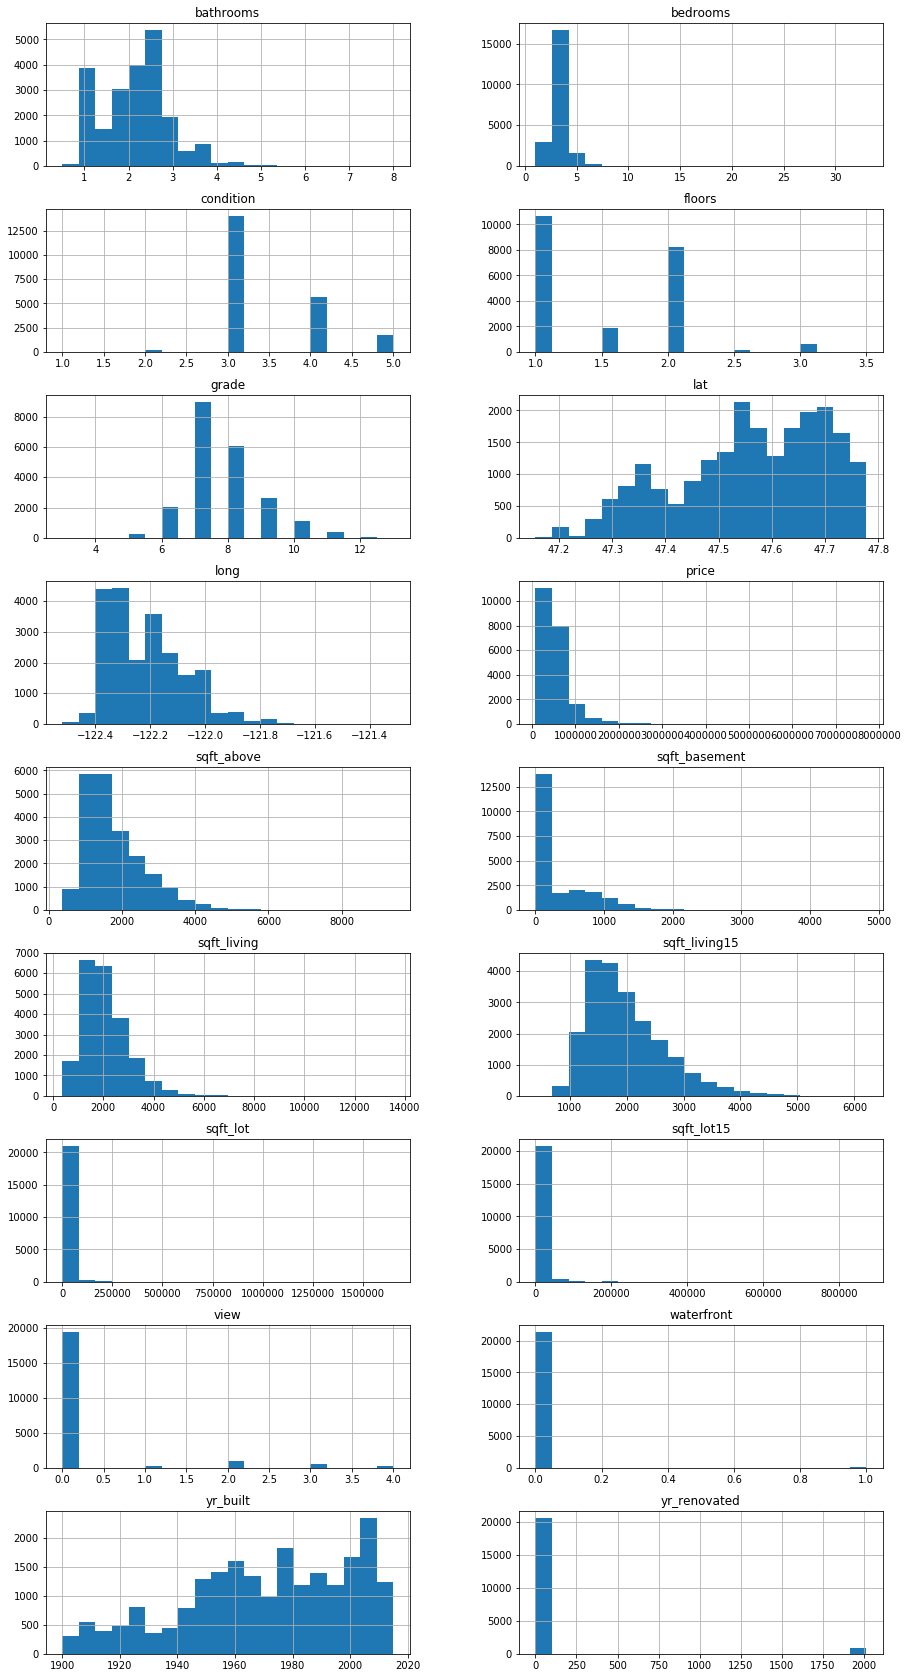

In [12]:
df.hist(layout=(9, 2), figsize=(15, 30), bins=20)
plt.show()

It appears several of the columns are skewed so I will apply a transformation with the natural logarithm and see if they improve. Also it is important to note that only a tiny amount of houses are waterfront. Domain knoledge would say that a house being waterfront is a big deal when it comes to price.

In [13]:
# record the columns that could benefit from a log transformation
cols_to_log = ["price", "sqft_above", "sqft_living", "sqft_living15",
              "sqft_lot", "sqft_lot15"]

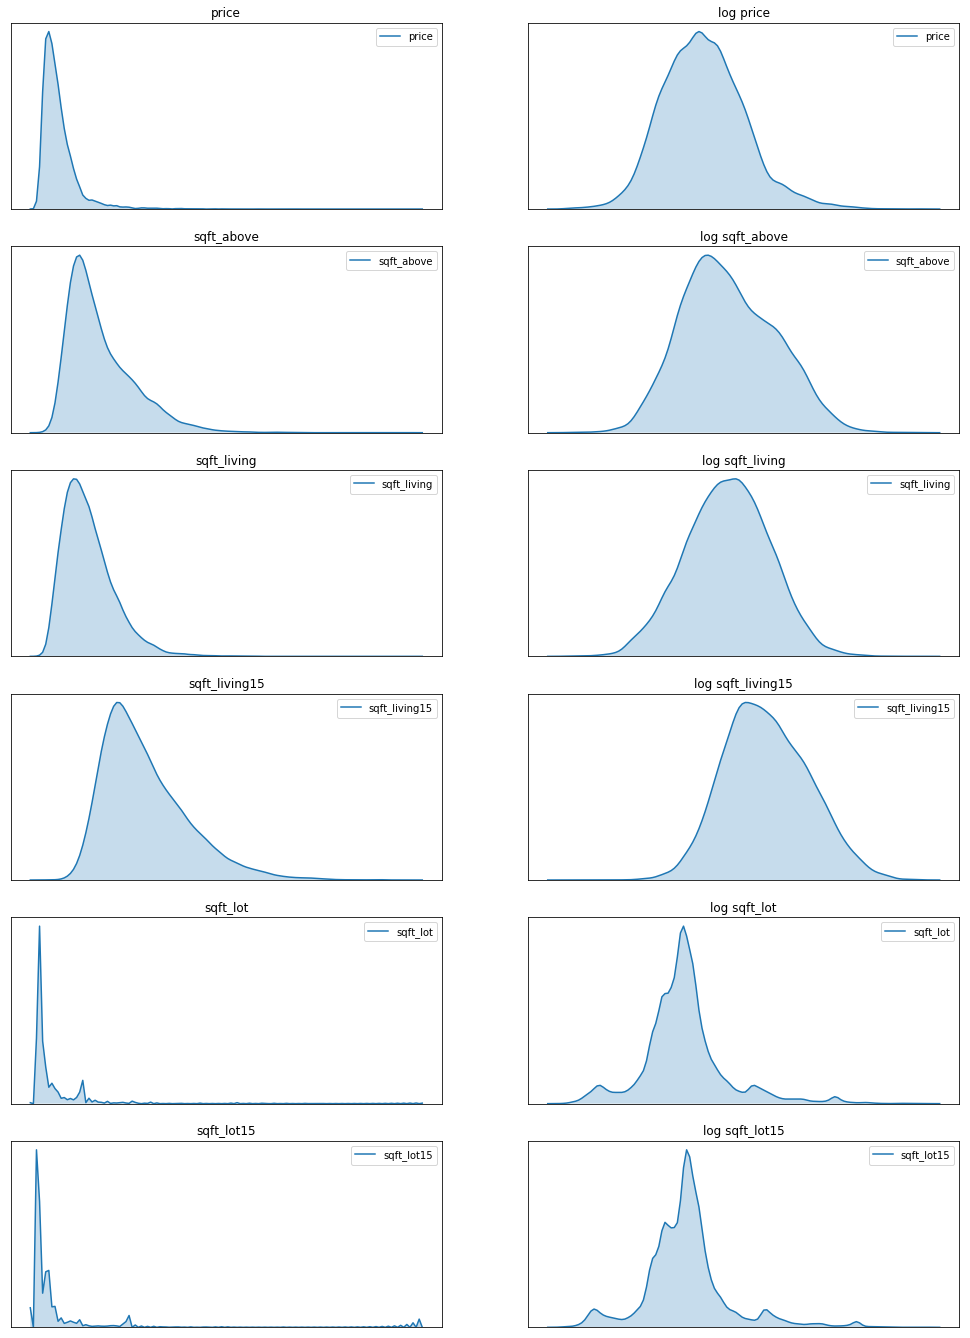

In [14]:
# generate subplots
fig, axes = plt.subplots(6, 2, figsize=(17, 24))

# loop over the list of columns recorded
for i, col in enumerate(cols_to_log):
    
    # create 2 axes one for the original 
    # and one for the log transformed column
    ax1 = axes[i, 0]
    ax2 = axes[i, 1]
    
    # create a kde plot for the original column
    ax1.set_title(col)
    sns.kdeplot(df[col], ax=ax1, shade=True)
    ax1.set_xticks([])
    ax1.set_yticks([])
    
    # create a kde plot for the log transformed column
    ax2.set_title("log " + col)
    log_col = np.log(df[col])     # apply log transformation
    sns.kdeplot(log_col, ax=ax2, shade=True)
    ax2.set_xticks([])
    ax2.set_yticks([])

# display all plots
plt.show()

All of the recorded columns seemed to become less skewed with a log transformation. I will save the logs as new columns.

In [15]:
# iterate over recorded columns
for col in cols_to_log:
    
    # create a new column in the data holding the 
    #log transformed version of each column
    df["log_" + col] = np.log(df[col])
    
# display dataframe head to get a look
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,log_price,log_sqft_above,log_sqft_living,log_sqft_living15,log_sqft_lot,log_sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,47.5112,-122.257,1340,5650,12.309982,7.073270,7.073270,7.200425,8.639411,8.639411
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,47.7210,-122.319,1690,7639,13.195614,7.682482,7.851661,7.432484,8.887653,8.941022
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,47.7379,-122.233,2720,8062,12.100712,6.646391,6.646391,7.908387,9.210340,8.994917
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,47.5208,-122.393,1360,5000,13.311329,6.956545,7.580700,7.215240,8.517193,8.517193
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,47.6168,-122.045,1800,7503,13.142166,7.426549,7.426549,7.495542,8.997147,8.923058


Now that all the numerical columns have been inspected I should inspect the distribution of the zipcodes. I will do this with a bar chart.

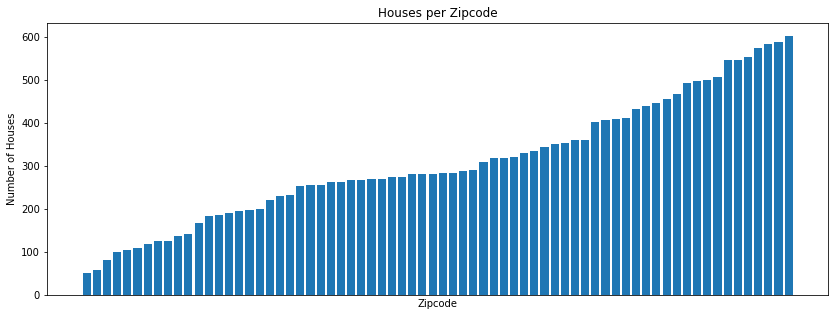

In [16]:
# get value counts for zip code in a nested list form
zip_value_counts = dict(df.zipcode.value_counts()).items() 

# sort list by the count
zip_value_counts = sorted(zip_value_counts, key=lambda x: x[1])

# seperate list into two lists
zip_names = [x[0] for x in zip_value_counts]
zip_counts = [x[1] for x in zip_value_counts]

# generate bar plot
plt.figure(figsize=(14, 5))
plt.bar(zip_names, zip_counts)

# set titles
plt.title("Houses per Zipcode")
plt.ylabel("Number of Houses")
plt.xlabel("Zipcode")

# hide x-ticks
plt.xticks([])

# show
plt.show()

Some zipcodes have much more data points than others, but it looks like every zipcode has enough houses to be included.

## 1.6 Splitting

Now it is time to split the data into train and test sets. This data set is fairly small so I will not be using a validation set, but instead I will use cross validation. I will be using a stratified split to make sure there is a fair ratio of waterfront houses between the sets. I will make the test size 0.15.

In [17]:
# instantiate splitter
sss = StratifiedShuffleSplit(test_size=0.15, random_state=42)

# split. stratifying on the waterfront column
train_indices, test_indices = next(sss.split(df, df.waterfront))

# make 2 new dataframes using indices
train = df.iloc[train_indices]
test = df.iloc[test_indices]

In [18]:
# check proportion of waterfront houses in both sets
train.waterfront.value_counts(normalize=True)

0    0.992426
1    0.007574
Name: waterfront, dtype: float64

In [19]:
test.waterfront.value_counts(normalize=True)

0    0.99259
1    0.00741
Name: waterfront, dtype: float64

In [20]:
# check the shape of the two sets
train.shape, test.shape

((18353, 25), (3239, 25))

# 1.7 Save

Now I will save the two sets as seperate .csv files. I will only open the test set once after I have finished modeling.

In [21]:
# save dataframes in .csv format
train.to_csv("train.csv", index=False)
test.to_csv("test.csv", index=False)